In [0]:
import pandas as pd
import numpy as np

In [3]:
!wget http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv

--2020-06-05 09:30:50--  http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [text/plain]
Saving to: ‘Wholesale customers data.csv’

Wholesale customers 100%[===================>]  14.67K  --.-KB/s    in 0.07s   

2020-06-05 09:30:51 (197 KB/s) - ‘Wholesale customers data.csv’ saved [15021/15021]



In [0]:
data = pd.read_csv("http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv")

In [39]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=4, whiten=True).fit(X)
X_pca = pca.transform(X) 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(X_pca)

import numpy as np
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.03,  0.44,  1.2 , -1.33],
       [-1.31, -0.  , -0.08, -0.14],
       [ 0.37, -0.55,  0.13,  1.37],
       [ 0.76,  0.52, -1.07, -0.36],
       [ 0.63, -0.52,  0.99, -0.04],
       [ 1.5 ,  1.43, -1.01,  1.43],
       [ 0.02, -1.33, -0.96, -0.51],
       [-1.23,  1.43,  0.4 ,  0.31]])

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
kmeans.labels_[:100]

array([3, 0, 0, 0, 3, 6, 0, 3, 0, 0, 3, 0, 0, 0, 6, 6, 6, 3, 6, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 6, 6, 0, 3, 3, 3, 0, 3, 3, 7, 0, 3,
       3, 0, 3, 0, 3, 3, 1, 1, 1, 7, 5, 2, 1, 7, 1, 2, 7, 5, 2, 5, 2, 1,
       2, 2, 2, 2, 5, 5, 2, 5, 5, 1, 1, 1, 5, 2, 2, 2, 2, 2, 2, 5, 1, 2,
       2, 2, 2, 5, 2, 7, 2, 5, 2, 5, 7, 2], dtype=int32)

In [19]:
kmeans.labels_[-100:]

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

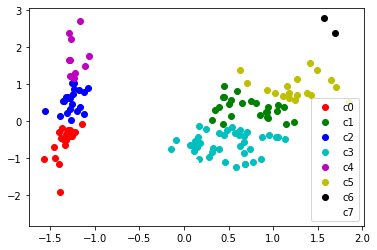

In [34]:
from sklearn.datasets import load_iris
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState
import pylab as pl

class clustering:
	def __init__(self):
		self.plot(load_iris().data)

	def plot(self, X):
		pca = PCA(n_components=2, whiten=True).fit(X)
		X_pca = pca.transform(X)
		kmeans = KMeans(n_clusters=8, random_state=RandomState(42)).fit(X_pca)
		plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2","c3","c4","c5","c6","c7"])

def plot_2D(data, target, target_names):
	colors = cycle('rgbcmykw')
	target_ids = range(len(target_names))
	pl.figure()
	for i, c, label in zip(target_ids, colors, target_names):
		pl.scatter(data[target == i, 0], data[target == i, 1],
					c=c, label=label)
	pl.legend()
	pl.show()

if __name__ == '__main__':
	c = clustering()

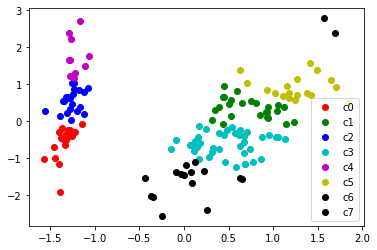

In [36]:
from sklearn.datasets import load_iris
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState
import pylab as pl

class clustering:
	def __init__(self):
		self.plot(load_iris().data)

	def plot(self, X):
		pca = PCA(n_components=2, whiten=True).fit(X)
		X_pca = pca.transform(X)
		kmeans = KMeans(n_clusters=8, random_state=RandomState(42)).fit(X_pca)
		plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2","c3","c4","c5","c6","c7"])

def plot_2D(data, target, target_names):
	colors = cycle('rgbcmykk')
	target_ids = range(len(target_names))
	pl.figure()
	for i, c, label in zip(target_ids, colors, target_names):
		pl.scatter(data[target == i, 0], data[target == i, 1],
					c=c, label=label)
	pl.legend()
	pl.show()

if __name__ == '__main__':
	c = clustering()